## Importing Required Libraries

In [1]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_samples,silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = pd.read_excel('Standardized_RFM_data.xlsx',index_col=0)

## K-Means Cluster - Finding Number of clusters using Elbow method and Silhouette score

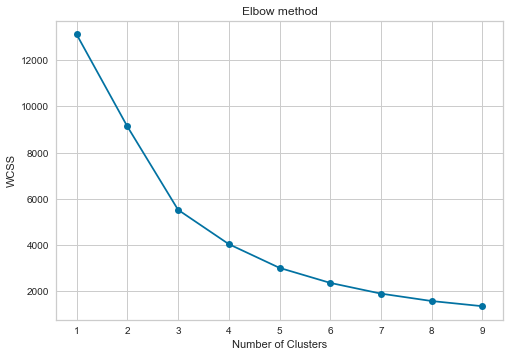

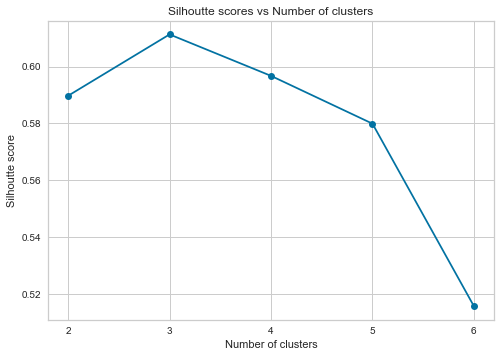

In [3]:
#-----------------------------------------------------------------------------------------------------------------------------
#                                                 K-Means Cluster 
#                      Finding Number of Clusters using Elbow Method and Silhouette score
#-----------------------------------------------------------------------------------------------------------------------------


kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia,"bo-")
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#Silhouette scores

silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[2:7]]
plt.plot(range(2,7), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4,5,6])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

#### here Silhoutte score is more for n=3 so lets fix 'Number of clusters = 3 '

# Silhouette Visualizer

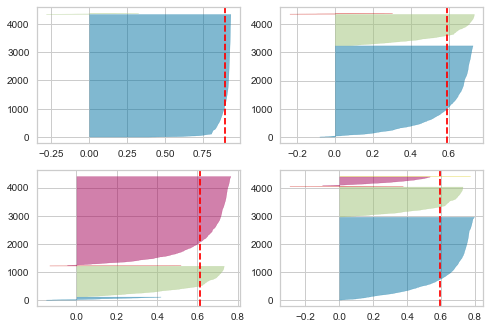

In [4]:
fig, ax = plt.subplots(2,2)
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, init='k-means++',n_init=100, max_iter=100)
    q,mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

## Agglomerative Cluster - Finding Number of clusters using Dendrogram

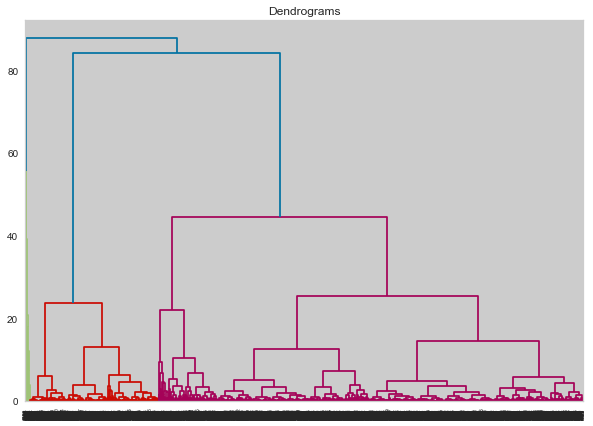

In [5]:
#-----------------------------------------------------------------------------------------------------------------------------
#                                                Agglomerative Cluster 
#                                     Finding Number of Clusters using Dendrogram
#-----------------------------------------------------------------------------------------------------------------------------

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

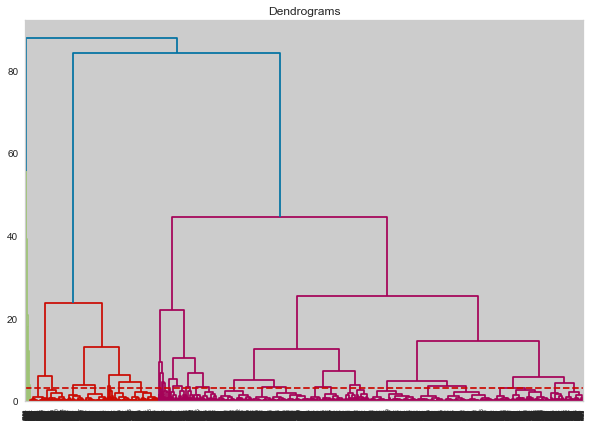

In [6]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

# Inferences:
####    1. In K-Means, from the elbow plot a sharp bend after the number of clusters increase by 2 and also Silhouette score is higher for Number of clusters = 3     
#### So, we will choose n_clusters = 3 to properly segment our customers.
####  2. In Dendrogram, cutting of Dendrogram is done and we go with Number of Clusters=3